# Learning Objectives



1. Baseline Models
2. Evaluation Metrics
3. Iterative Processing
4. Overfitting vs Underfitting
5. Bias Variance Trade Offs




In [ ]:
%%capture
!pip install numpy torch scikit-learn

# Iterative Process ML Pipeline (Not Everything is NN) :


<div>
<img src="
https://cdn.prod.website-files.com/614c82ed388d53640613982e/635b9f1f245a98db1fc773ba_632078674751778a88b7cf48_model-life-cycle-1.png" width="800"/>
</div>


When doing ML we will often go through this high level process:

1.   Extract a Dataset
2.   Use Statistical Methods to Analyze the Dataset
3.   Preprocess to Nullify any issues with the Dataset
4.   Train a Machine Learning Model
5.   Evaluate the Model
6.   Tune the Model
7.   Repeat Steps 4 to 6 until you get a model you like
8.   You validate the model on dataset your model hasn't seen.
9.   Your done



In this ML Principles I will show you why Data Validation and Evaluation Metrics are Important.
At the same time some Neural Network Critical Thinking things we have to consider.

# Baseline Models (Neural Networks)

How do you know the model you built is actually cream of the crop? Maybe by doing the method you chose, it is bare minimum and could be improved upon heavily. You need first establish a baseline.

In neural networks, the baseline model principle refers to starting with a simple model that establishes a minimum level of performance to benchmark against more complex architectures. A baseline might be as trivial as always predicting the mean or majority class, or as standard as linear or logistic regression. Baseline help diagnose whether a task is inherently simple, whether a neural network is undertrained or overfitting, and whether a lightweight model might be sufficient in practice.

# Evaluation Metrics (Classification) Not Everything is NN:

Previously, we have only looked at accuracy as the metric to look at how well our models are doing for classification, but it is not a comprehensive metric. We will show this is true with an example.

## True Positive, True Negative, False Positive, False Negative

When making a prediction we can split the prediction up into four different categories.


1.   True Positive
2.   True Negative
3.   False Positive
4.   False Negative


### **Definition**

**True ___:**

The prediction of the model is correct.

**False ____:**

The prediction of the model and the actual value of the model is incorrect.

## Accuracy

### **Intuition**

Overall how correct is the model at predicting?

### **Definition**

$$ \text{Accuracy: } = \frac{\text{TN + TP}}{\text{TN + TP + FN + FP}}$$

### **The image below is a good way of visualizing TP FP FN and TN**


<div>
<img src="https://spotintelligence.com/wp-content/uploads/2024/09/confusion-matrix.jpg" width="800"/>
</div>

## Precision

### **Inutition**

Out of all the predicted positives, how many are actually positives?

This is the metric to find how confident the model is in its positive predictions

### **Definition**

$$ \text{Precision: } = \frac{\text{TP}}{\text{TP + FP}}$$

## Recall

### **Inutition**

Out of all the actual positive, how good is the model at predicting actual positives?

This is the metric to find how good the model is to find actual positive values

### **Definition**

$$ \text{Recall: } = \frac{\text{TP}}{\text{TP + FN}}$$

### **The image below is a good way to visualize Precision, Recall and Accuracy**



<div>
<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm
" width="800"/>
</div>

## Confusion Matrix

The plots shown above are confusion matrices and they help with calculating accuracy, precision and recall

## **Why Should I Care**

It's great that I know all this stuff, but why should I care about Recall, Precision, Confusion Matrix, F1 Score. What is the actual use case?



### **Scenario A**

Let's say we have doctor who diagnoses patients with cancer. I've provided code below with true labels and false labels, and the predictions that this doctor have. 0 means the patient has no cancer and 1 means the patient has cancer

First plot the Confusion matrix then compute the precision and recall and interpret what that means.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# True labels
y_true = [1]*10 + [0]*90

# Predicted labels
y_pred = [1]*2 + [0]*8 + [1]*5 + [0]*85


#I would look into confusion_matrix()
#I would also look into ConfusionMatrixDisplay documentation

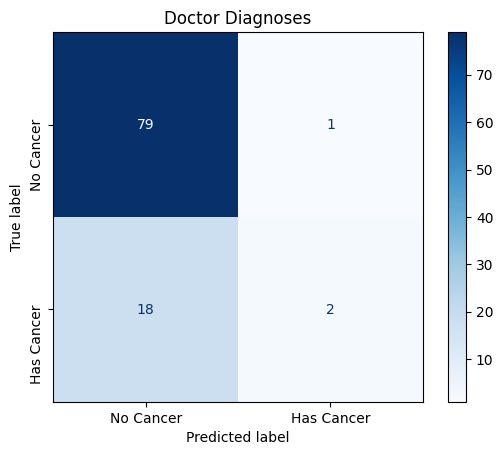

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Cancer", "Has Cancer"])
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Blues')

for tick in ax.get_yticklabels():
    tick.set_rotation(90)

plt.title("Doctor Diagnoses")
plt.show()

Calculate Accuracy

Accuracy:

Calculate Recall

Recall:

Calculate Precision

Precision:

What is the interpretation of these results?

Answer:

### **Scenario B:**

Let's now say we have a security system that monitors people in public and tries to detect who are dangerous

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Ground truth: 20 threats (1), 80 safe (0)
y_true = np.array([1]*20 + [0]*80)

# Prediction: only 2 threats caught, 1 false alarm
y_pred = np.array([1]*2 + [0]*18 + [1] + [0]*79)

# Confusion Matrix

Calculate Accuracy?

Accuracy:

Calculate Recall?

Recall:

Calculate Precision?

Precision:

What is the interpretation for these results?

Answer:

### My Way of Understanding

Precision: If the model does predict correctly, how well does it predict correctly?

Recall: Does the model predict correctly at all when the label is there?

Accuracy: In general does the model predict well?

## F1 Score

F1 Score is a harmonic mean of recall and precision. It is a metric that balances how important recall and precision is and then outputs a score based on the balance.

### **Intuition**

How good is the model at predicting without over-predicting?

### **Definition**

$$\text{F1} = 2* \frac{\text{Precision}*\text{Recall}}{\text{Precision}+\text{Recall}}$$

Go back and compute the F1 Score of Scenario A and B

Scenario A:

Scenario B:

A good F1 score indicates that both precision and recall scores are well

# Capacity (After Neural Networks)

## Definition:

Capacity is defined as the model's ability to understand complex and non-linear behavior. As you increase the number of nodes and layer the capacity of the model to understand the underlying behavior in training data increases. The other method is to use more non-linear activation functions to help with this issue. The other thing we will look at is the training size and it's ability to effect Neural Network Ability

## Dataset

Let's look back the linear regression dataset, where we modeled the power law.

In [ ]:
import gdown
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

url = 'https://drive.google.com/uc?id=1VRY7bTCuxepR4MRma8CRBtuP0vHJ_w5_'
output = 'voltage_data.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1VRY7bTCuxepR4MRma8CRBtuP0vHJ_w5_
To: /content/voltage_data.csv
100%|██████████| 492/492 [00:00<00:00, 809kB/s]


'voltage_data.csv'

In [ ]:
df = np.genfromtxt("/content/voltage_data.csv", delimiter = ',', skip_header=1)
VOLT = 0
VOLTUNC = 1
CURR = 2
CURRUNC = 3

voltage = df[:, VOLT]
voltage_unc = df[:, VOLTUNC]
current = df[:, CURR] * 10**(-3)
current_unc = df[:, CURRUNC] * 10**(-3)


This was the best I could do using normal gradient descent:

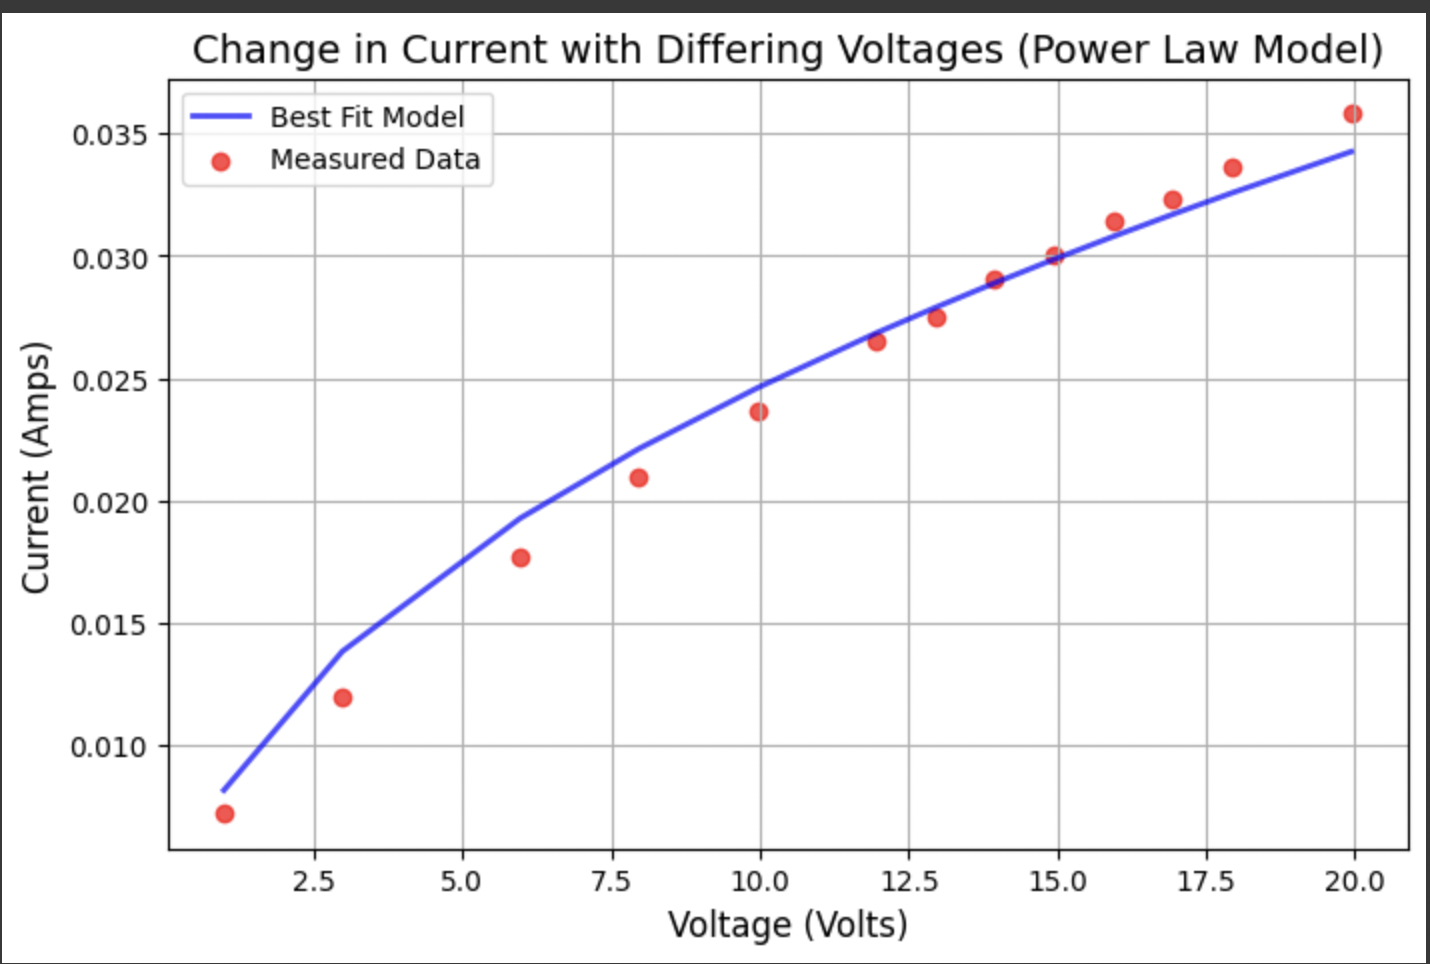

Let's try and use Neural Networks to predict regression here.

## First Experiment (Training Size):

What I want you to do is convert the training data I provided into Tensors. I want you to train a three layer first layer 16 nodes, second layer 32 nodes, third layer 16 nodes

In [ ]:
#Train Test Split


In [ ]:
#Convert to Tensors

In [ ]:
#Fix the Tensor Type here (Use .float()) #Reshape Tensors


In [ ]:
#Build a neural network of a large enough size in terms of # of neurons and layers.
#Number of Layers > 2 Number of Nuerons >= 16 neurons.

In [ ]:
#Define criterion and optimizer.


In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.

    #predictions from x_train data


    #Sets optimizer so it won't accumulate gradients

    #Calculate gradient descent

    #Update weights

    #Print loss:
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.0074
Epoch 100 Loss: 0.0000
Epoch 200 Loss: 0.0000
Epoch 300 Loss: 0.0000
Epoch 400 Loss: 0.0000
Epoch 500 Loss: 0.0000
Epoch 600 Loss: 0.0000
Epoch 700 Loss: 0.0000
Epoch 800 Loss: 0.0000
Epoch 900 Loss: 0.0000


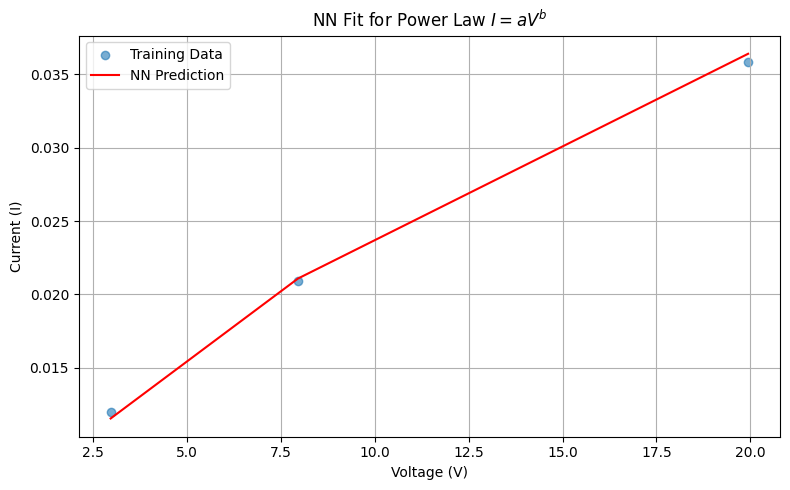

In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_test_sorted, _ = torch.sort(x_test, dim=0)
    y_sorted_pred = model(x_test)

plt.figure(figsize=(8, 5))
plt.scatter(x_test.numpy(), y_test.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_test_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

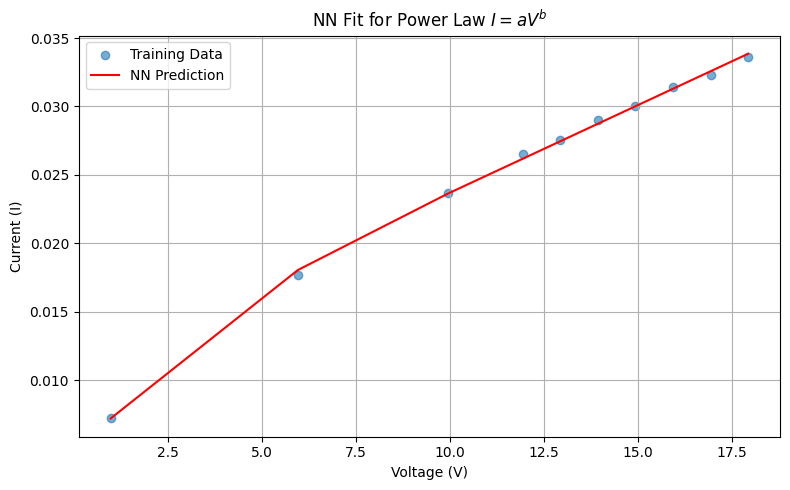

In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_sorted, _ = torch.sort(x_train, dim=0)
    y_sorted_pred = model(x_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

As you can see it's suprisingly pretty good.

Next I will provide the same dataset but extrapolated to 10,000 training data, and we will see how well the model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate synthetic power law data: I = a * V^b + noise
a = 0.0068
b = 0.5467
V = torch.linspace(0.1, 20, steps=200).view(-1, 1)
I = a * V**b + torch.normal(0, 0.001, size=V.shape)

# 2. Train-test split
x_train_increased, x_test_increased, y_train_increased, y_test_increased = train_test_split(V, I, test_size=0.2, random_state=42)


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#Instantiated a new instance of your model.

#Train the new instance.

#The number of epochs you do (i.e.) convergence conditions is up to you.

    #predictions from x_train data

    #Sets optimizer so it won't accumulate gradients

    #Calculate gradient descent

    #Update weights

    #Print loss:
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.4452
Epoch 100 Loss: 0.0000
Epoch 200 Loss: 0.0000
Epoch 300 Loss: 0.0000
Epoch 400 Loss: 0.0000
Epoch 500 Loss: 0.0000
Epoch 600 Loss: 0.0000
Epoch 700 Loss: 0.0000
Epoch 800 Loss: 0.0000
Epoch 900 Loss: 0.0000


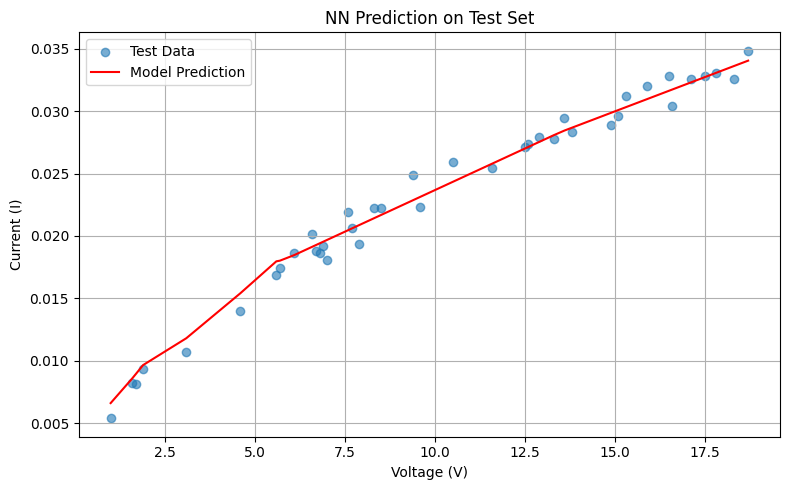

In [ ]:
# Get predictions on x_test
with torch.no_grad():
    y_pred = model(x_test_increased)

# Convert to numpy if needed
x_test_np = x_test_increased.detach().numpy()
y_test_np = y_test_increased.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Sort by x_test for clean plotting
sorted_idx = x_test_np[:, 0].argsort()
x_sorted = x_test_np[sorted_idx]
y_sorted = y_pred_np[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_test_np, y_test_np, label='Test Data', alpha=0.6)
plt.plot(x_sorted, y_sorted, color='red', label='Model Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Prediction on Test Set")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


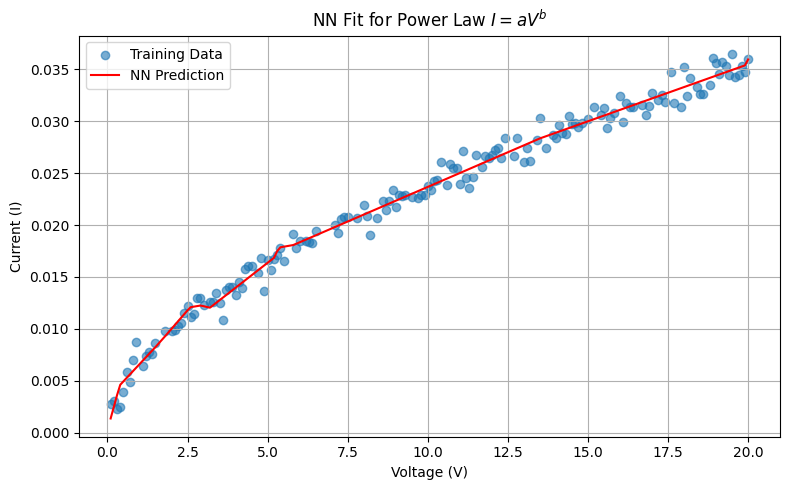

In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_sorted, _ = torch.sort(x_train, dim=0)
    y_sorted_pred = model(x_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

So it looks like NN pretty good at predicting the data for both. Let's try something interesting now. We will introduce Out of Distribution Data

## Out of Distribution (OOD)

Neural networks are amazing at predicting data that it has already been trained on. Unfortunately this regression task although it looks like we did train test splitting, we actually just tested how well the modeled fitted the training dataset. Here comes the concept of OOD.



<div>
<img src="https://miro.medium.com/v2/resize:fit:1200/1*FoRz6g2SOQaRvolvnMGDaw.png" width="800"/>
</div>


I like to think of OOD as the real test. OOD is data that you might face in a the real world. It is data that the model should be able to predict even though it wasn't trained on.

### **Question?**

Since we trained the model on $$V \in [0,20]$$ what would OOD be?

Answer: Any value outside this range.

In [ ]:
V_ood = torch.linspace(0, 25, steps=100).view(-1, 1)
I_ood = a * V_ood ** b + torch.normal(0, 0.002, size=V_ood.shape)

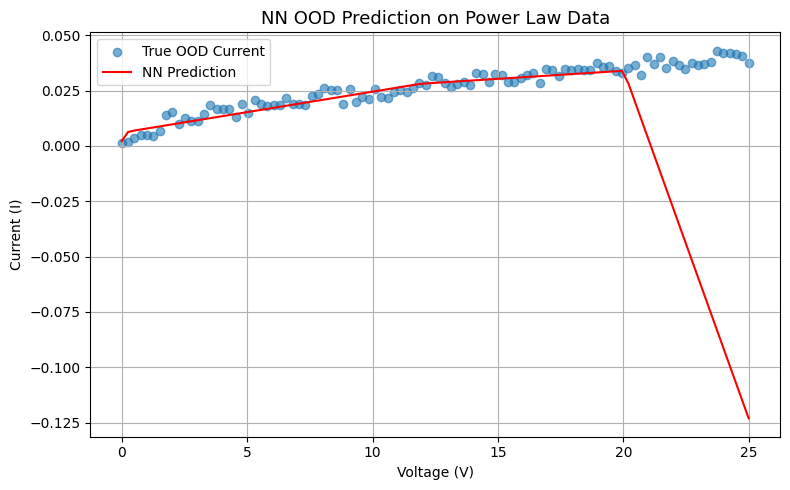

In [ ]:
# === NN Prediction (no normalization) ===
with torch.no_grad():
    y_ood_pred = model(V_ood)

# === Plot ===
plt.figure(figsize=(8, 5))
plt.title("NN OOD Prediction on Power Law Data", fontsize=13)
plt.scatter(V_ood, I_ood, label="True OOD Current", alpha=0.6)
plt.plot(V_ood, y_ood_pred, color='red', label="NN Prediction")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

As you can see if you try and graph the OOD [20,25] range, the model performance tanks. There is something wrong here. We will take a look later at how to fix this issue.

## Second Experiment (Number of Nodes)

Let's use the same amount of data but change the number of nodes now.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate synthetic power law data: I = a * V^b + noise
a = 0.0068
b = 0.5467
V = torch.linspace(0.1, 20, steps=200).view(-1, 1)
I = a * V**b + torch.normal(0, 0.001, size=V.shape)

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(V, I, test_size=0.2, random_state=42)

# 3. Define a new neural network with same number of layers but smaller number of neurons. # of neurons < 5 for example.
d

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.
for epoch in range(1000):

    #predictions from x_train data
    preds = model(x_train)
    loss = criterion(preds, y_train)

    #Sets optimizer so it won't accumulate gradients
    optimizer.zero_grad()

    #Calculate gradient descent
    loss.backward()

    #Update weights
    optimizer.step()

    #Print loss:
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.0038
Epoch 100 Loss: 0.0000
Epoch 200 Loss: 0.0000
Epoch 300 Loss: 0.0000
Epoch 400 Loss: 0.0000
Epoch 500 Loss: 0.0000
Epoch 600 Loss: 0.0000
Epoch 700 Loss: 0.0000
Epoch 800 Loss: 0.0000
Epoch 900 Loss: 0.0000


In [ ]:
# Get predictions on x_test
with torch.no_grad():
    y_pred = model(x_test)

# Convert to numpy if needed
x_test_np = x_test.detach().numpy()
y_test_np = y_test.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Sort by x_test for clean plotting
sorted_idx = x_test_np[:, 0].argsort()
x_sorted = x_test_np[sorted_idx]
y_sorted = y_pred_np[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_test_np, y_test_np, label='Test Data', alpha=0.6)
plt.plot(x_sorted, y_sorted, color='red', label='Model Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Prediction on Test Set")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_sorted, _ = torch.sort(x_train, dim=0)
    y_sorted_pred = model(x_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

What can you glean from this?

## Last Experiment (Number of Layers)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate synthetic power law data: I = a * V^b + noise
a = 0.0068
b = 0.5467
V = torch.linspace(0.1, 20, steps=200).view(-1, 1)
I = a * V**b + torch.normal(0, 0.001, size=V.shape)

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(V, I, test_size=0.2, random_state=42)

# 3. Define and instantiate a new instance with different number of layers from your base model. The model you defined in the first experiment.



In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.
for epoch in range(1000):

    #predictions from x_train data
    preds = model(x_train)
    loss = criterion(preds, y_train)

    #Sets optimizer so it won't accumulate gradients
    optimizer.zero_grad()

    #Calculate gradient descent
    loss.backward()

    #Update weights
    optimizer.step()

    #Print loss:
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.0163
Epoch 100 Loss: 0.0163
Epoch 200 Loss: 0.0163
Epoch 300 Loss: 0.0163
Epoch 400 Loss: 0.0163
Epoch 500 Loss: 0.0163
Epoch 600 Loss: 0.0163
Epoch 700 Loss: 0.0163
Epoch 800 Loss: 0.0163
Epoch 900 Loss: 0.0163


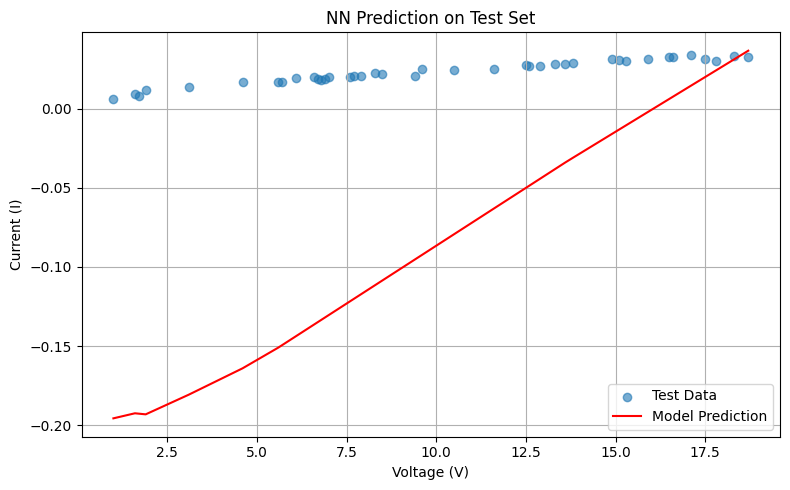

In [ ]:
# Get predictions on x_test
with torch.no_grad():
    y_pred = model(x_test)

# Convert to numpy if needed
x_test_np = x_test.detach().numpy()
y_test_np = y_test.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Sort by x_test for clean plotting
sorted_idx = x_test_np[:, 0].argsort()
x_sorted = x_test_np[sorted_idx]
y_sorted = y_pred_np[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_test_np, y_test_np, label='Test Data', alpha=0.6)
plt.plot(x_sorted, y_sorted, color='red', label='Model Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Prediction on Test Set")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


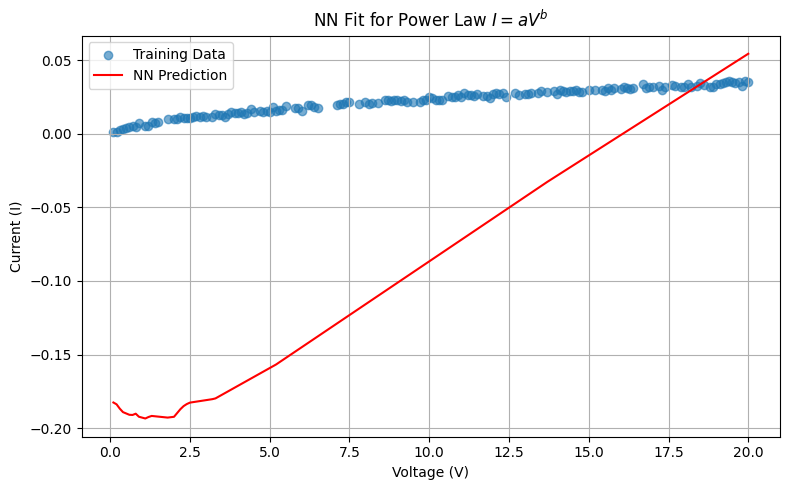

In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_sorted, _ = torch.sort(x_train, dim=0)
    y_sorted_pred = model(x_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Underfitting Overfitting Bias Variance (After Neural Networks)

Let's go back and look at the Experiment 1, 2 and 3.

When building machine learning models we want to choose a model that both captures the underlying signals and minimize errors. The two sources of errors for prediction is bias and variance

## Bias

Bias is a measure of how far off predictions are from true values.

## Variance

Variance is a measure of how much predictions fluctuate based on different training data.

##**Underfitting**

As you can obviously tell, there are definitely major issues when you decrease the number of nodes and number of layers as they can't capture complex behaviors.

The inability to capture non-linear behaviors is called (Underfitting)

The model is too simple to capture the power law. The model has high bias

## **Overfitting**

Let's look at out first experiment, the model does an amazing job at predicting training data, but it is not able to handle OOD. What does this mean?

It means it captures the non-linear behavior too well and only the non-linear behavior of the data it has been trained on. This is called overfitting.

Overfitting implies that the model has high variance

## Solutions to Underfitting?

As you might've guessed increasing the number of paramters, the number of layers, and adding more non-linear activation functions will allow the model to capture more non-linear behaviors. Now you can overdo it and finding the sweet spot is the challenge here.  

## Solutions to Overfitting: Regularization



<div>
<img src="https://www.dailydoseofds.com/content/images/2023/08/image-273.png" width="800"/>
</div>

We can modify our loss function however way we want. We can add as many terms or get rid of number of loss terms within the loss function. A common practice when facing overfitting is to add a regularization penalty term.

The regularization term is an additional component added to the cost (or loss) function to prevent overfitting. It penalizes large parameter values, encouraging the model to find simpler solutions that generalize better to unseen data.  

The intuition for regularization is that very large parameter weights in a model often mean the model is trying too hard to “bend” itself to fit the training data exactly. This flexibility lets it capture noise or irrelevant patterns — which is exactly what we call overfitting.

Two common types are:  
$$
    \textbf{L1 regularization (Lasso):} \text{adds the sum of the absolute values of the parameters.} \hspace{1em}
    \lambda \sum_{j=1}^{m} | \theta_j |
$$

$$
    \textbf{L2 regularization (Ridge):} \text{adds the sum of the squared parameter values.} \hspace{1em}
    \lambda \sum_{j=1}^{m} \theta_j^2
$$


Here, $\lambda$ is the regularization parameter that controls the strength of the penalty. Larger $\lambda$ values enforce stronger regularization.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Generate synthetic power law data: I = a * V^b + noise
a = 0.0068
b = 0.5467
V = torch.linspace(0.1, 20, steps=1000).view(-1, 1)
I = a * V**b + torch.normal(0, 0.001, size=V.shape)

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(V, I, test_size=0.2, random_state=42)

# 3. Define simple regression network
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(1, 16),
            nn.Tanh(),
            nn.Linear(16,32),
            nn.Tanh(),
            nn.Linear(32, 16),
            nn.Tanh(),
            nn.Linear(16,1),
        )

    def forward(self, features):
        return self.network(features)

model = NeuralNetwork()


Within the optimizer, there is an argument called weight_decay which accomplishes a similar task to regularization.

Weight decay is a technique used to prevent overfitting by discouraging the model parameters from becoming too large. It is mathematically equivalent to applying L2 regularization.  

In standard gradient descent, the parameter update rule is:  
$$
\theta \leftarrow \theta - \alpha \, \nabla_\theta J
$$

where $\alpha$ is the learning rate and $J$ is the loss function.  

With weight decay, an additional penalty proportional to the size of the weights is included:  
$$
\theta \leftarrow \theta - \alpha \, \nabla_\theta J \;-\; \alpha \lambda \theta
$$

where $\lambda$ is another hyperparameter


## Your Turn

In [ ]:

#Change the weight_decay and see how that affects, also change the lr
#SET LR

LR =
WD =

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=LR , weight_decay = WD)


In [ ]:
#The number of epochs you do (i.e.) convergence conditions is up to you.
for epoch in range(500):

    #predictions from x_train data
    preds = model(x_train)
    loss = criterion(preds, y_train)

    #Sets optimizer so it won't accumulate gradients
    optimizer.zero_grad()

    #Calculate gradient descent
    loss.backward()

    #Update weights
    optimizer.step()

    #Print loss:
    if epoch % 100 == 0:
        print(f"Epoch {epoch} Loss: {loss.item():.4f}")

Epoch 0 Loss: 0.0000
Epoch 100 Loss: 0.0000
Epoch 200 Loss: 0.0000
Epoch 300 Loss: 0.0000
Epoch 400 Loss: 0.0000


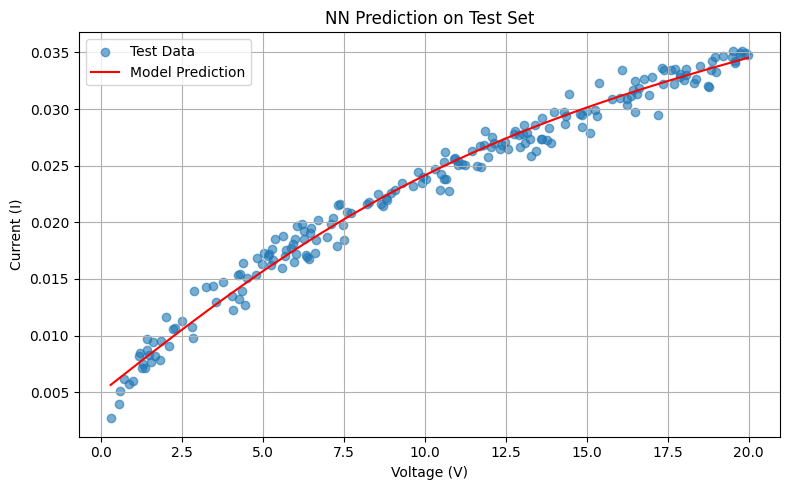

In [ ]:
# Get predictions on x_test
with torch.no_grad():
    y_pred = model(x_test)

# Convert to numpy if needed
x_test_np = x_test.detach().numpy()
y_test_np = y_test.detach().numpy()
y_pred_np = y_pred.detach().numpy()

# Sort by x_test for clean plotting
sorted_idx = x_test_np[:, 0].argsort()
x_sorted = x_test_np[sorted_idx]
y_sorted = y_pred_np[sorted_idx]

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_test_np, y_test_np, label='Test Data', alpha=0.6)
plt.plot(x_sorted, y_sorted, color='red', label='Model Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Prediction on Test Set")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


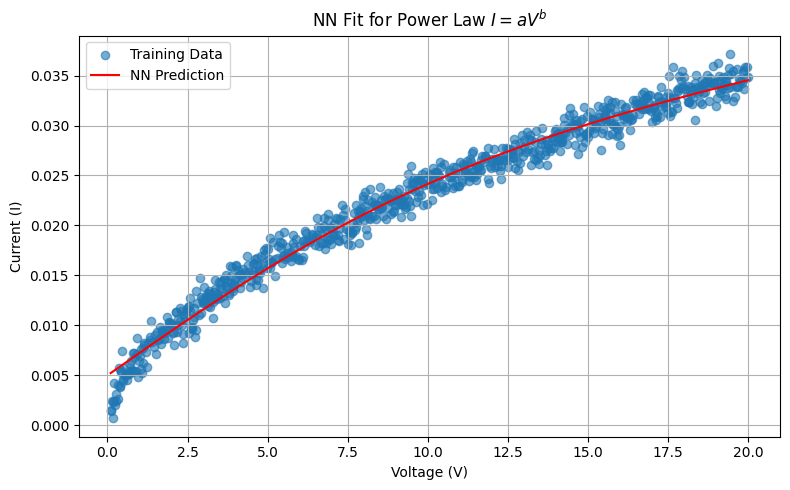

In [ ]:
# 6. Plot predictions vs ground truth
with torch.no_grad():
    x_sorted, _ = torch.sort(x_train, dim=0)
    y_sorted_pred = model(x_sorted)

plt.figure(figsize=(8, 5))
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training Data', alpha=0.6)
plt.plot(x_sorted.numpy(), y_sorted_pred.numpy(), color='red', label='NN Prediction')
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.title("NN Fit for Power Law $I = aV^b$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
V_ood = torch.linspace(0, 200, steps=100).view(-1, 1)
I_ood = a * V_ood ** b + torch.normal(0, 0.002, size=V_ood.shape)

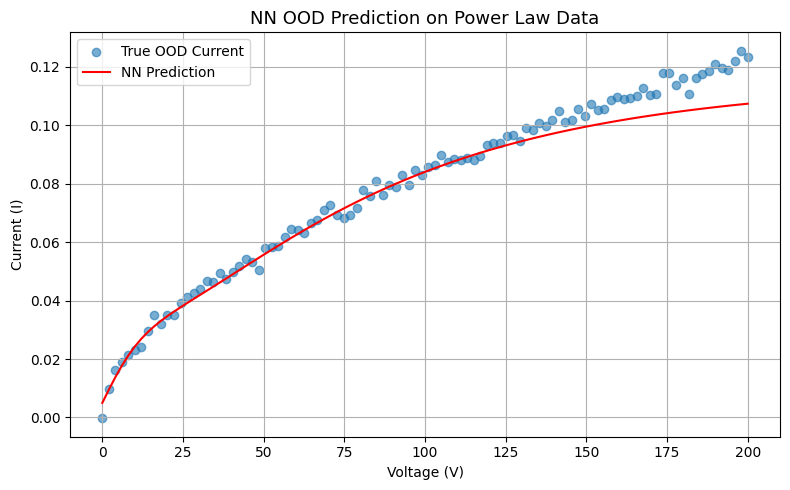

In [ ]:
with torch.no_grad():
    y_ood_pred = model(V_ood)

plt.figure(figsize=(8, 5))
plt.title("NN OOD Prediction on Power Law Data", fontsize=13)
plt.scatter(V_ood, I_ood, label="True OOD Current", alpha=0.6)
plt.plot(V_ood, y_ood_pred, color='red', label="NN Prediction")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()